In [5]:
import os
import zipfile

In [7]:
%pwd
os.chdir('../')
%pwd

'c:\\Users\\Suel.Abbasi\\Desktop\\DSA\\projects\\end to end ml project\\mental-health-tech-project\\mental-health-treatment-predictor'

In [2]:
# download the file from kaggle

import kagglehub

# Download latest version
path = kagglehub.dataset_download("osmi/mental-health-in-tech-survey")

print("Path to dataset files:", path)

c:\Users\Suel.Abbasi\Desktop\DSA\projects\end to end ml project\mental-health-tech-project\mental-health-treatment-predictor\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 48.8k/48.8k [00:00<00:00, 132kB/s]

Extracting files...
Path to dataset files: C:\Users\Suel.Abbasi\.cache\kagglehub\datasets\osmi\mental-health-in-tech-survey\versions\3


In [418]:
unzip_path = 'artifacts/mental_health'

# with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
#     zip_ref.extractall(unzip_path)

In [8]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from random import randint

In [9]:
# Define the absolute file path
file_path = Path('artifacts\data_ingestion\survey.csv')

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

In [421]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [422]:
print(len(df.columns))

27


In [10]:
# check teh df 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [11]:
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [12]:
# only age is int

object_df = df.select_dtypes(include=['object']).drop(['Timestamp'], axis= 1)

In [13]:
object_df.isnull().sum()

Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [427]:
for col in object_df.columns:
    print('-'*10)
    print(object_df[col].value_counts())
    print('-'*10)
    print('\n')

----------
Gender
Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female                                              2
Female (trans)                                      2
Male-ish                                            1
Trans-female                                        1
Male (CIS)                                          1
Mal       

In [428]:
''' 
drop country, state
'''

object_df['Gender'] = object_df.Gender.str.lower().replace({
    'male': 'm',     'm' : 'm',
    'cis male': 'm',     'man':'m',
    'make': 'm',     'something kinda male?':'m',
    'maile':'m',     'male-ish':'m',
    'mal': 'm',     'male (cis)':'m',
    'mail': 'm',     'msle':'m',
    'mail': 'm',     'malr':'m', 'guy (-ish) ^_^ ' : 'm', 'ostensibly male, unsure what that really means': 'm',
    'cis man': 'm' , 'female':'f',
    'f': 'f', 'woman': 'f', 'female (trans)':'f', 'trans-femal':'f'
    , 'cis female': 'f' , 'femake': 'f' , 'cis-female/femme': 'f',
    'femail': 'f','male':'m','female':'f'
})

In [429]:
# Categorize other values as LGBTQ
object_df['Gender'] = object_df['Gender'].apply(lambda x: x if x in ['m', 'f'] else 'lgbtq')

In [430]:
object_df.Gender.value_counts()

Gender
m        990
f        246
lgbtq     23
Name: count, dtype: int64

In [431]:
object_df['self_employed'] = object_df['self_employed'].str.lower().apply(lambda x: 1 if x == 'yes' else 0)
object_df['family_history'] = object_df['family_history'].str.lower().apply(lambda x: 1 if x == 'yes' else 0)
object_df['treatment'] = object_df['treatment'].str.lower().apply(lambda x: 1 if x == 'yes' else 0)
object_df['work_interfere'] = object_df['work_interfere'].str.lower().apply(lambda x: 0 if x in ['rarely','never'] else 1)
object_df['remote_work'] = object_df['remote_work'].str.lower().apply(lambda x: 1 if x == 'yes' else 0)
object_df['tech_company'] = object_df['tech_company'].str.lower().apply(lambda x: 1 if x == 'yes' else 0)
object_df['benefits'] = object_df['benefits'].str.lower().apply(lambda x: 1 if x == 'yes' else 0)
object_df['care_options'] = object_df['care_options'].str.lower().apply(lambda x: 1 if x == 'yes' else 0)
object_df['wellness_program'] = object_df['wellness_program'].str.lower().apply(lambda x: 1 if x == 'yes' else 0)
object_df['seek_help'] = object_df['seek_help'].str.lower().apply(lambda x: 1 if x == 'yes' else 0)
object_df['anonymity'] = object_df['anonymity'].str.lower().apply(lambda x: 1 if x == 'yes' else 0)
object_df['leave'] = object_df['leave'].str.lower().apply(lambda x: 1 if x in ['very easy', 'somewhat easy'] else 0)
object_df['mental_health_consequence'] = object_df['mental_health_consequence'].str.lower().apply(lambda x: 0 if x == 'no' else 1)
object_df['coworkers'] = object_df['coworkers'].str.lower().apply(lambda x: 1 if x == 'yes' else 0)
object_df['supervisor'] = object_df['supervisor'].str.lower().apply(lambda x: 1 if x == 'yes' else 0)
object_df['mental_health_interview'] = object_df['mental_health_interview'].str.lower().apply(lambda x: 1 if x == 'yes' else 0)
object_df['phys_health_interview'] = object_df['phys_health_interview'].str.lower().apply(lambda x: 1 if x == 'yes' else 0)
object_df['mental_vs_physical'] = object_df['mental_vs_physical'].str.lower().apply(lambda x: 1 if x == 'yes' else 0)
object_df['obs_consequence'] = object_df['obs_consequence'].str.lower().apply(lambda x: 1 if x == 'yes' else 0)
object_df['phys_health_consequence'] = object_df['phys_health_consequence'].str.lower().apply(lambda x: 0 if x == 'np' else 1)

In [432]:
object_df.drop(['Country','state'], axis = 1, inplace= True)
object_df.head()

,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,f,0,0,1,1,6-25,0,1,1,0,...,1,0,1,0,1,0,0,1,0,NaN
1,m,0,0,0,0,More than 1000,0,0,0,0,...,0,1,1,0,0,0,0,0,0,NaN
2,m,0,0,0,0,6-25,0,1,0,0,...,0,0,1,1,1,1,1,0,0,NaN
3,m,0,1,1,1,26-100,0,1,0,1,...,0,1,1,0,0,0,0,0,1,NaN
4,m,0,0,0,0,100-500,1,1,1,0,...,0,0,1,0,1,1,1,0,0,NaN


In [433]:
object_df.no_employees.value_counts()

no_employees
6-25              290
26-100            289
More than 1000    282
100-500           176
1-5               162
500-1000           60
Name: count, dtype: int64

In [434]:
object_df['no_employees'] = object_df['no_employees'].str.lower().replace({
    '1-5':'small','6-25':'small','26-100':'small','100-500':'medium','500-1000':'medium','more than 1000':'large'
})

In [435]:
object_df.head()

,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,f,0,0,1,1,small,0,1,1,0,...,1,0,1,0,1,0,0,1,0,NaN
1,m,0,0,0,0,large,0,0,0,0,...,0,1,1,0,0,0,0,0,0,NaN
2,m,0,0,0,0,small,0,1,0,0,...,0,0,1,1,1,1,1,0,0,NaN
3,m,0,1,1,1,small,0,1,0,1,...,0,1,1,0,0,0,0,0,1,NaN
4,m,0,0,0,0,medium,1,1,1,0,...,0,0,1,0,1,1,1,0,0,NaN


In [436]:
# comments, for now let's drop it
object_df.drop(['comments'], axis = 1, inplace= True)

In [437]:
object_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Gender                     1259 non-null   object
 1   self_employed              1259 non-null   int64 
 2   family_history             1259 non-null   int64 
 3   treatment                  1259 non-null   int64 
 4   work_interfere             1259 non-null   int64 
 5   no_employees               1259 non-null   object
 6   remote_work                1259 non-null   int64 
 7   tech_company               1259 non-null   int64 
 8   benefits                   1259 non-null   int64 
 9   care_options               1259 non-null   int64 
 10  wellness_program           1259 non-null   int64 
 11  seek_help                  1259 non-null   int64 
 12  anonymity                  1259 non-null   int64 
 13  leave                      1259 non-null   int64 
 14  mental_h

In [438]:
finaldf = df.drop(df.select_dtypes(include=['object']).columns, axis = 1)

In [439]:
print(finaldf.shape, object_df.shape)

(1259, 1) (1259, 22)


In [440]:
data = pd.merge(finaldf, object_df, left_index=True, right_index= True)

In [441]:
print(data.shape)

(1259, 23)


In [442]:
data.describe()

# it seem Age has some outliers
# becauase age cannot be negative and also age cannot be 329 9999999

,Age,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,wellness_program,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1.259000e+03,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,...,1259.000000,1259.000000,1259.000000,1259.0,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000
mean,7.942815e+07,0.115965,0.390786,0.505957,0.693407,0.298650,0.818904,0.378872,0.352661,0.181890,...,0.297855,0.374901,0.610802,1.0,0.178713,0.409849,0.034948,0.160445,0.272438,0.146148
std,2.818299e+09,0.320310,0.488121,0.500163,0.461262,0.457848,0.385251,0.485299,0.477988,0.385907,...,0.457497,0.484290,0.487762,0.0,0.383264,0.492001,0.183722,0.367164,0.445391,0.353395
min,-1.726000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.700000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.100000e+01,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.600000e+01,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000e+11,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [443]:
# remove outliers
Q1 = data.Age.quantile(0.25)
Q3 = data.Age.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5* IQR
upper_bound = Q3 + 1.5* IQR

data_filtered = data[(data.Age >= lower_bound) & (data.Age <= upper_bound)]

In [444]:
print(data.shape, data_filtered.shape)

(1259, 23) (1219, 23)


In [445]:
data_filtered.Age.describe()

count    1219.000000
mean       31.468417
std         6.276310
min        18.000000
25%        27.000000
50%        31.000000
75%        35.000000
max        49.000000
Name: Age, dtype: float64

In [446]:
''' 
Q1. How does the frequency of mental health illness and attitudes towards mental health vary by geographic location?
Q2. What are the strongest predictors of mental health illness or certain attitudes towards mental health in the workplace?
Q3. Does mental health leads to any physical health manifestation?
Q3. Does sexuality have any connection to mental health?
'''

' \nQ1. How does the frequency of mental health illness and attitudes towards mental health vary by geographic location?\nQ2. What are the strongest predictors of mental health illness or certain attitudes towards mental health in the workplace?\nQ3. Does mental health leads to any physical health manifestation?\nQ3. Does sexuality have any connection to mental health?\n'

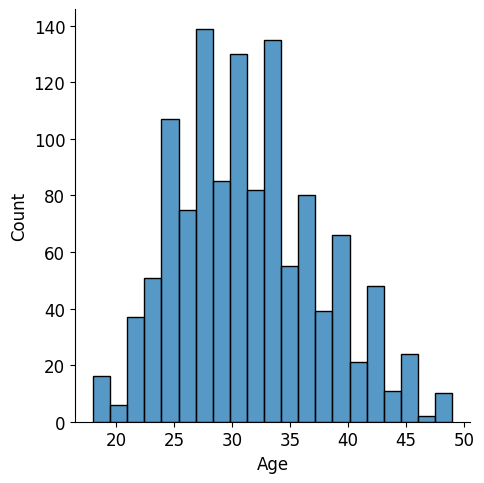

In [447]:

sns.displot(data_filtered, x='Age')

In [448]:
# Define the bins and labels
bins = [ 18, 25, 45, float('inf')]
labels = [ 'Young', 'Middle', 'Old']

# Create a new column with age buckets
data_filtered['age_group'] = pd.cut(data_filtered['Age'], bins=bins, labels=labels, right=False)
# data_filtered.drop(['Age'], axis=1, inplace=True)

C:\Users\Suel.Abbasi\AppData\Local\Temp\ipykernel_45968\3967352020.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['age_group'] = pd.cut(data_filtered['Age'], bins=bins, labels=labels, right=False)


In [449]:
data_filtered.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'age_group'],
      dtype='object')

In [450]:
# label encode no_employee and one hot encode gender
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
le = OrdinalEncoder()

data_filtered['no_employees'] = le.fit_transform(data_filtered['no_employees'].values.reshape(-1,1) )
data_filtered['age_group'] = le.fit_transform(data_filtered['age_group'].values.reshape(-1,1) )


C:\Users\Suel.Abbasi\AppData\Local\Temp\ipykernel_45968\2421617534.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['no_employees'] = le.fit_transform(data_filtered['no_employees'].values.reshape(-1,1) )
C:\Users\Suel.Abbasi\AppData\Local\Temp\ipykernel_45968\2421617534.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['age_group'] = le.fit_transform(data_filtered['age_group'].values.reshape(-1,1) )


In [451]:
ohe = OneHotEncoder(sparse_output=False)
encoded_gender = ohe.fit_transform(data_filtered['Gender'].values.reshape(-1,1) )


# Create a DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_gender, columns=ohe.get_feature_names_out(['Gender']))

# Concatenate the original DataFrame with the encoded DataFrame
data_filtered = pd.concat([data_filtered, encoded_df], axis=1)

# Drop the original 'Gender' column if no longer needed
# data_filtered.drop('Gender', axis=1, inplace=True)

data_filtered.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_group,Gender_f,Gender_lgbtq,Gender_m
0,37.0,f,0.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,44.0,m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,32.0,m,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,31.0,m,0.0,1.0,1.0,1.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,31.0,m,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [452]:
working_df = data_filtered.copy()

In [453]:
working_df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_group,Gender_f,Gender_lgbtq,Gender_m
0,37.0,f,0.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,44.0,m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,32.0,m,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,31.0,m,0.0,1.0,1.0,1.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,31.0,m,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [454]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1258 entries, 0 to 1186
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1219 non-null   float64
 1   Gender                     1219 non-null   object 
 2   self_employed              1219 non-null   float64
 3   family_history             1219 non-null   float64
 4   treatment                  1219 non-null   float64
 5   work_interfere             1219 non-null   float64
 6   no_employees               1219 non-null   float64
 7   remote_work                1219 non-null   float64
 8   tech_company               1219 non-null   float64
 9   benefits                   1219 non-null   float64
 10  care_options               1219 non-null   float64
 11  wellness_program           1219 non-null   float64
 12  seek_help                  1219 non-null   float64
 13  anonymity                  1219 non-null   float64
 1

In [455]:
# check correlation

<Axes: >

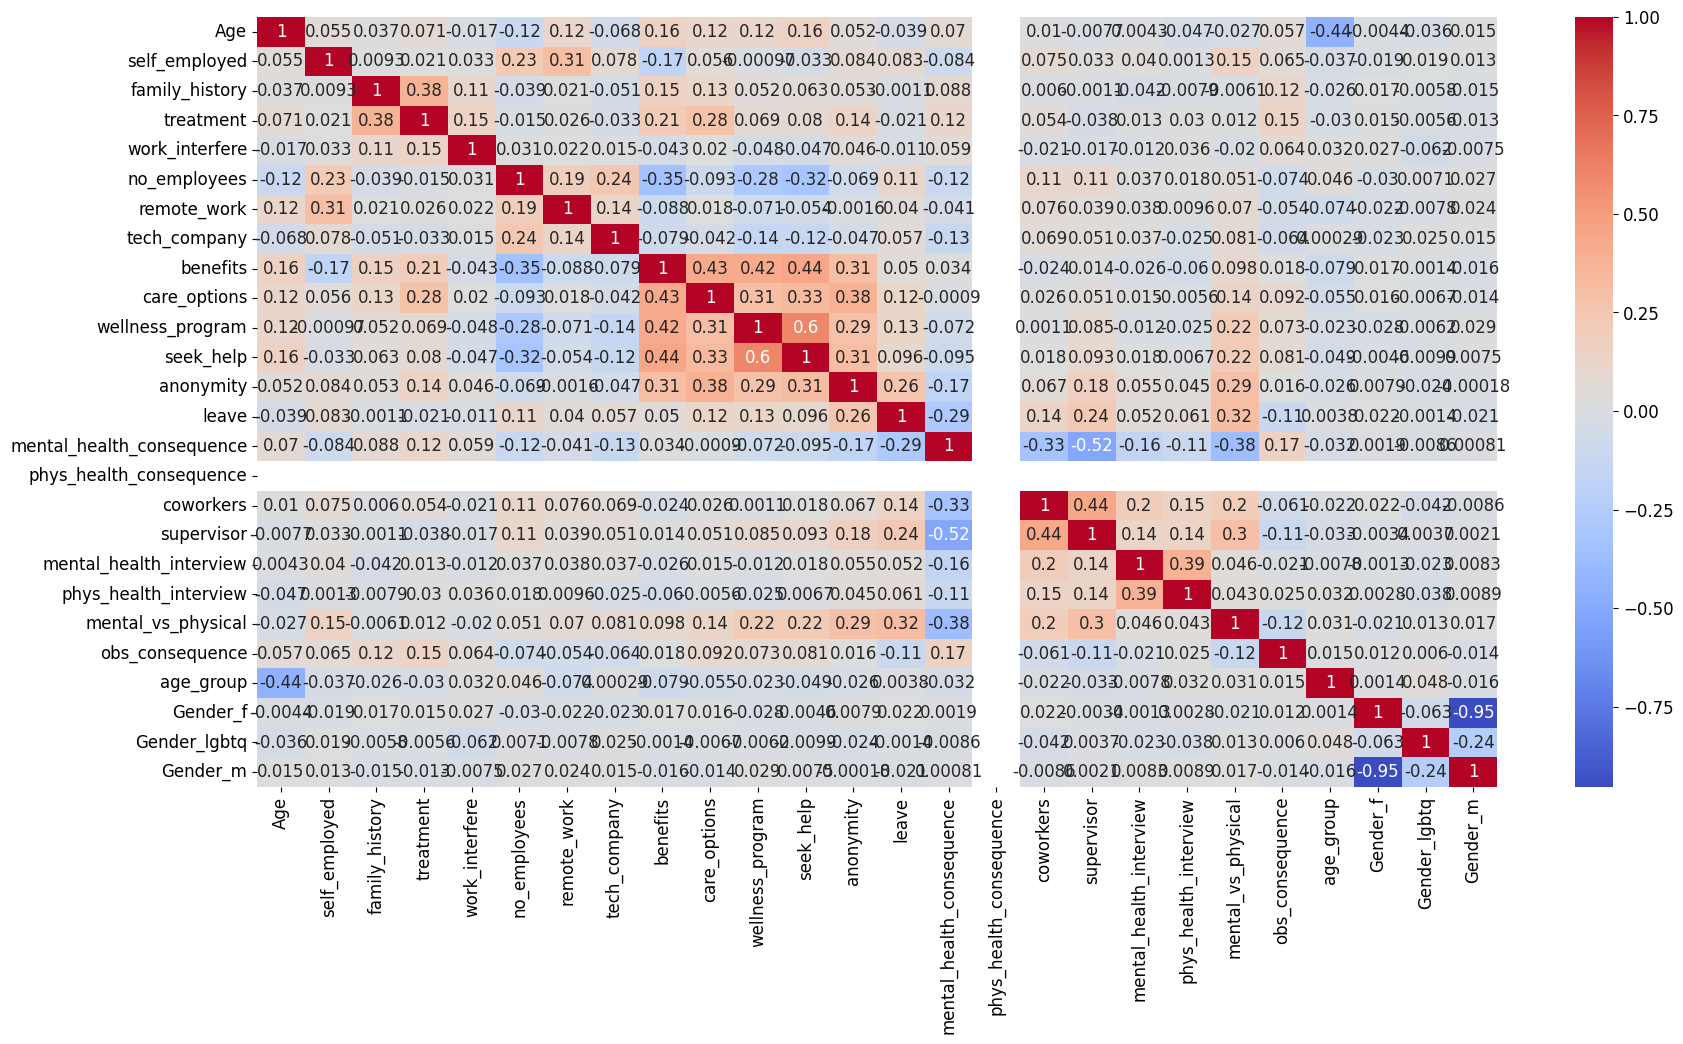

In [456]:
corr = working_df.drop(['Gender'], axis = 1).corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot= True ,cmap='coolwarm')

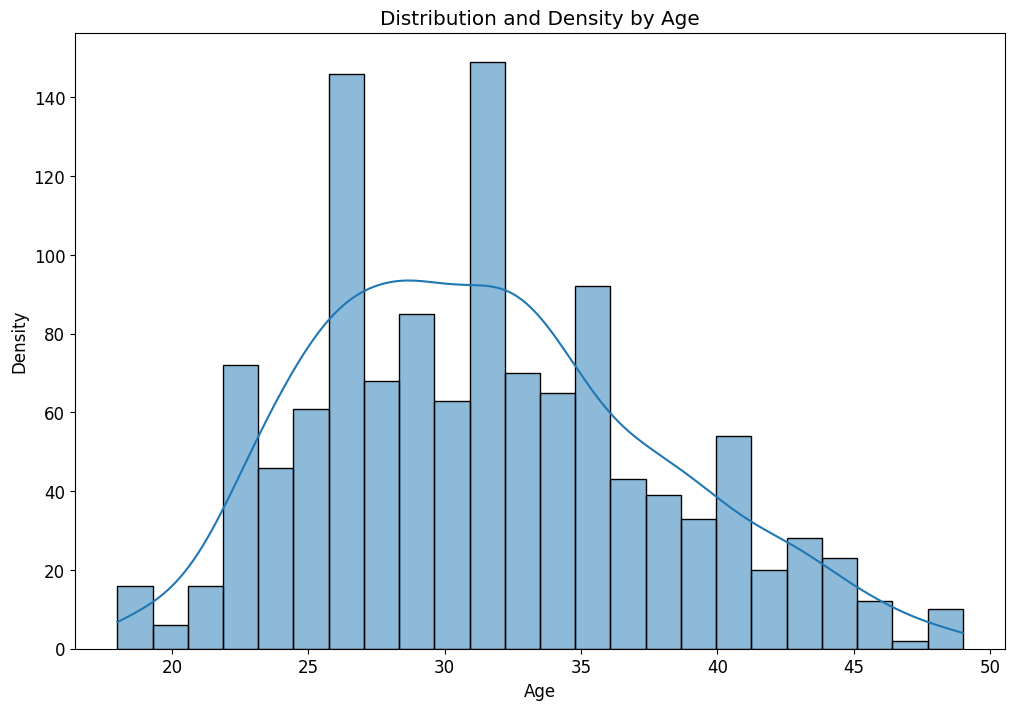

In [457]:
# Set the figure size correctly
plt.figure(figsize=(12, 8))  # Corrected `figsize` argument

# Use sns.histplot instead of sns.distplot (since distplot is deprecated)
sns.histplot(working_df["Age"], bins=24, kde=True)

# Add titles and labels
plt.title("Distribution and Density by Age")
plt.xlabel("Age")
plt.ylabel("Density")

# Show the plot
plt.show()

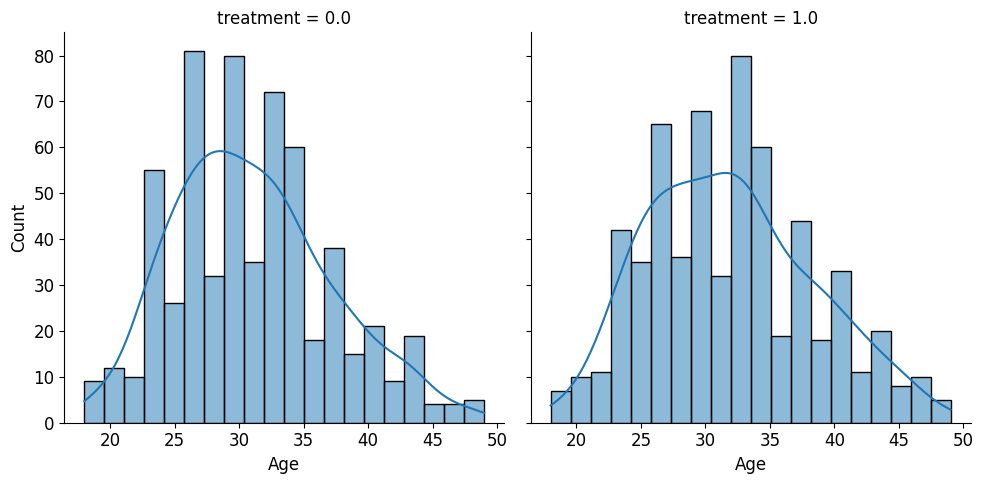

In [458]:
# Separate by treatment or not
g = sns.FacetGrid(working_df, col='treatment', height=5)
g.map(sns.histplot, "Age", bins=20, kde=True)

plt.show()

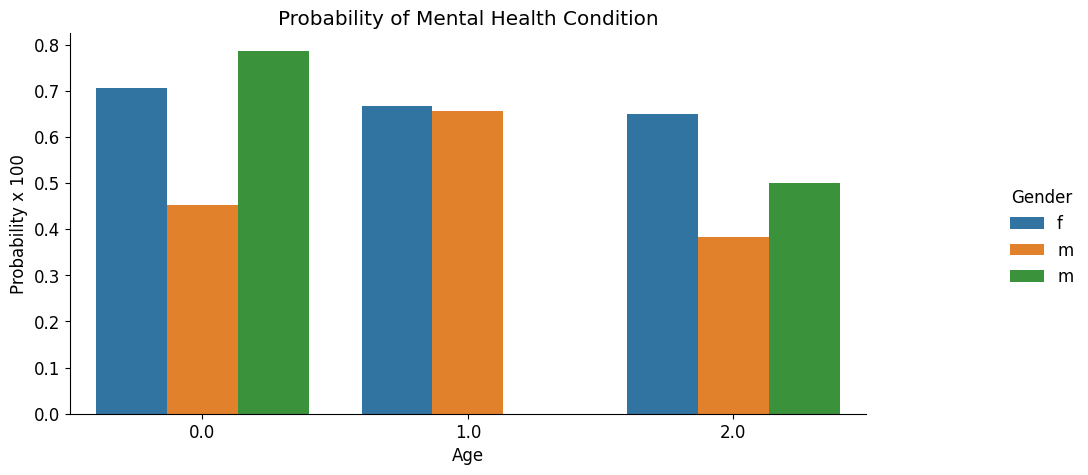

In [459]:
# Use errorbar=None instead of ci=None
g = sns.catplot(
    x="age_group", y="treatment", hue="Gender",
    data=working_df, kind="bar",
    errorbar=None, height=5, aspect=2, legend_out=True
)

# Set custom tick labels
# g.set_xticklabels(working_df.age_group)

# Set plot title and labels
plt.title('Probability of Mental Health Condition')
plt.ylabel('Probability x 100')
plt.xlabel('Age')

# Replace legend labels
new_labels = working_df['Gender']
for t, l in zip(g._legend.texts, new_labels): 
    t.set_text(l)

# Adjust legend position
g.fig.subplots_adjust(top=0.9, right=0.8)

plt.show()

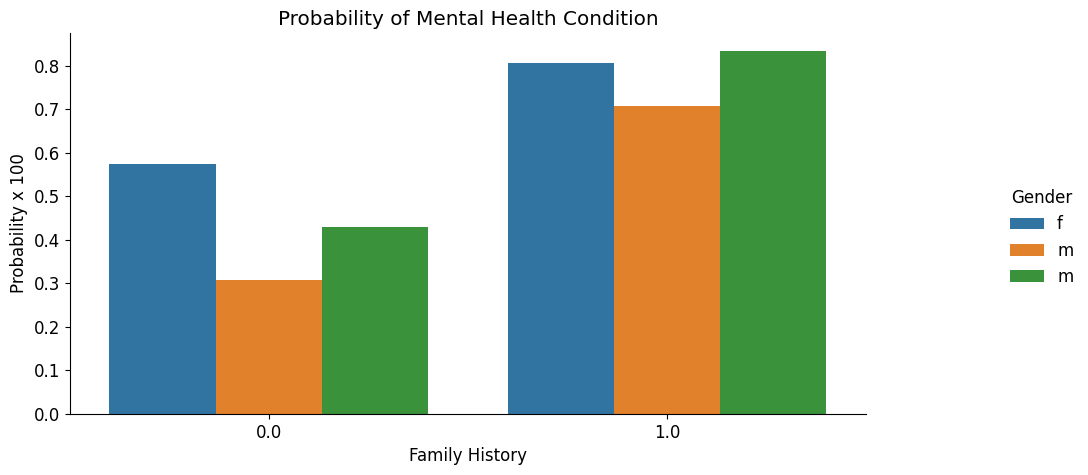

In [460]:
#o = labelDictionary['label_family_history']

# Use errorbar=None instead of ci=None
g = sns.catplot(
    x="family_history", y="treatment", hue="Gender",
    data=working_df, kind="bar",
    errorbar=None, height=5, aspect=2, legend_out=True
)

# Set custom tick labels
# g.set_xticklabels(working_df.family_history)

# Set plot title and labels
plt.title('Probability of Mental Health Condition')
plt.ylabel('Probability x 100')
plt.xlabel('Family History')

# Replace legend labels
new_labels = working_df['Gender']
for t, l in zip(g._legend.texts, new_labels): 
    t.set_text(l)

# Adjust legend position
g.fig.subplots_adjust(top=0.9, right=0.8)

plt.show()

In [461]:
model_df = working_df.drop(['Age','Gender'], axis=1)

In [462]:
model_df.columns

Index(['self_employed', 'family_history', 'treatment', 'work_interfere',
       'no_employees', 'remote_work', 'tech_company', 'benefits',
       'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'age_group', 'Gender_f',
       'Gender_lgbtq', 'Gender_m'],
      dtype='object')

In [463]:
# since gender female and males are correlated, let create a new feature gender_straight
model_df['gender_straight'] = model_df.Gender_f + model_df.Gender_m
model_df.drop(['Gender_f','Gender_m'], axis=1, inplace= True)

In [464]:
model_df.columns

Index(['self_employed', 'family_history', 'treatment', 'work_interfere',
       'no_employees', 'remote_work', 'tech_company', 'benefits',
       'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'age_group', 'Gender_lgbtq',
       'gender_straight'],
      dtype='object')

<Axes: >

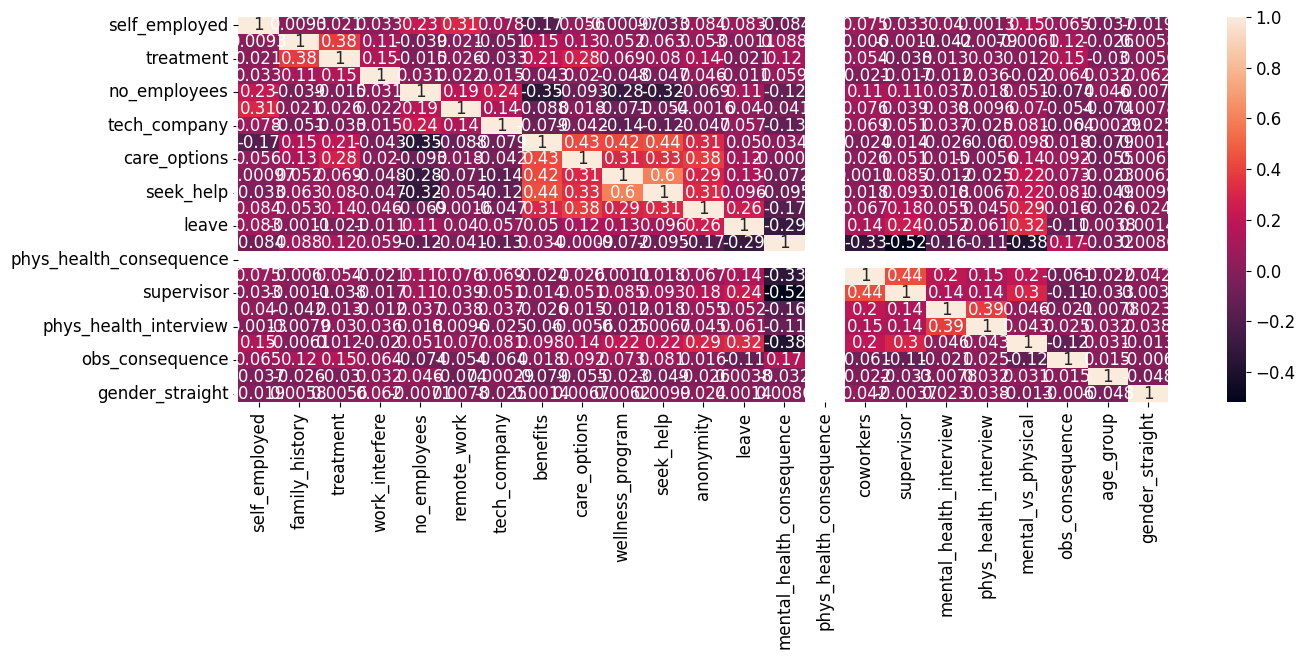

In [465]:
plt.figure(figsize=(15,5))
sns.heatmap(model_df.drop(['Gender_lgbtq'],axis=1).corr(), annot=True)

In [466]:
# phy_health_consequences seems wronf
# Drop the highly correlated variables
# model_df = model_df.drop(['phys_health_consequence'], axis=1)

In [467]:
model_df = model_df.fillna(0)

In [468]:
x = model_df.drop(['treatment'], axis=1)
y = model_df['treatment']

In [469]:
# prep
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, binarize

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# grid search
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score


#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

In [470]:
# scaling
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

x_scaled_df = pd.DataFrame(x_scaled, columns= x.columns)

In [471]:
# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_scaled_df, y, test_size=0.2, random_state=42)

In [472]:
# Create dictionaries for final graph
methodDictionary = {}

In [473]:
"--------------------------------------"
# Tuning with cross validation score
"--------------------------------------"
def tuningCV(knn):
    
    # search for an optimal value of K for KNN
    k_range = list(range(1, 31))
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, x_scaled_df, y, cv=10, scoring='accuracy')
        k_scores.append(scores.mean())
    print(k_scores)
    # plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
    plt.plot(k_range, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

In [474]:
def evalClassModel(model, y_test, y_pred_class, plot=False):
    
    #Classification accuracy: percentage of correct predictions
    print(y_test, y_pred_class)
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))  # calculate accuracy
    
    #Null accuracy: accuracy that could be achieved by always predicting the most frequent class
    print('Null accuracy:\n', y_test.value_counts()) # examine the class distribution of the testing set (using a Pandas Series method)
    
    print('Percentage of ones:', y_test.mean()) # calculate the percentage of ones
    
    # calculate the percentage of zeros
    print('Percentage of zeros:',1 - y_test.mean()) # calculate the percentage of zeros
    
    #Comparing the true and predicted response values
    print('True:', y_test.values[0:25])
    print('Pred:', y_pred_class[0:25])
    
    
    #Confusion matrix
    # save confusion matrix and slice into four pieces
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    
    # visualize Confusion Matrix
    sns.heatmap(confusion,annot=True,fmt="d") 
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Metrics computed from a confusion matrix
    
    #Classification Accuracy: Overall, how often is the classifier correct?
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Classification Accuracy:', accuracy)
    
    #Classification Error: Overall, how often is the classifier incorrect?
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))
    
    #False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)
    
    #Precision: When a positive value is predicted, how often is the prediction correct?
    print('Precision:', metrics.precision_score(y_test, y_pred_class))
    
    
    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))
    
    # calculate cross-validated AUC
    print('Cross-validated AUC:', cross_val_score(model, x_scaled_df, y, cv=10, scoring='roc_auc').mean())
    
    "----------------------------------------"
    #Adjusting the classification threshold
    "----------------------------------------"
    # print the first 10 predicted responses
    # 1D array (vector) of binary values (0, 1)
    print('First 10 predicted responses:\n', model.predict(X_test)[0:10])
    
    print('First 10 predicted probabilities of class members:\n', model.predict_proba(X_test)[0:10]) # print the first 10 predicted probabilities of class membership

    
    model.predict_proba(X_test)[0:10, 1] # print the first 10 predicted probabilities for class 1
    
    
    y_pred_prob = model.predict_proba(X_test)[:, 1] # store the predicted probabilities for class 1
    
    if plot == True:
        # histogram of predicted probabilities
        
        plt.rcParams['font.size'] = 12 # adjust the font size 
        
        plt.hist(y_pred_prob, bins=8) # 8 bins
        
        
        plt.xlim(0,1) # x-axis limit from 0 to 1
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')
    
    
    # predict treatment if the predicted probability is greater than 0.3
    # it will return 1 for all values above 0.3 and 0 otherwise
    # results are 2D so we slice out the first column
    y_pred_prob = y_pred_prob.reshape(-1,1) 
    y_pred_class = binarize(y_pred_prob, threshold=0.3)
    
    # print the first 10 predicted probabilities
    print('First 10 predicted probabilities:\n', y_pred_prob[0:10])
    
    "------------------------------------------"
    #ROC Curves and Area Under the Curve (AUC)
    "------------------------------------------"
    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
    
    
    #fpr: false positive rate
    #tpr: true positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    if plot == True:
        plt.figure()
        
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()
    #IMPORTANT: first argument is true values, second argument is predicted probabilities 
    #we pass y_test and y_pred_prob
    #we do not use y_pred_class, because it will give incorrect results without generating an error
    #roc_curve returns 3 objects fpr, tpr, thresholds

    
    # define a function that accepts a threshold and prints sensitivity and specificity
    def evaluate_threshold(threshold):
        #Sensitivity: When the actual value is positive, how often is the prediction correct?
        #Specificity: When the actual value is negative, how often is the prediction correct?print('Sensitivity for ' + str(threshold) + ' :', tpr[thresholds > threshold][-1])
        print('Specificity for ' + str(threshold) + ' :', 1 - fpr[thresholds > threshold][-1])

    # One way of setting threshold
    predict_mine = np.where(y_pred_prob > 0.50, 1, 0)
    confusion = metrics.confusion_matrix(y_test, predict_mine)
    print(confusion)
    
    
    return accuracy

----------- Logistic Regression -------------
578     0.0
102     0.0
52      0.0
64      0.0
1108    1.0
       ... 
158     1.0
565     1.0
406     1.0
245     1.0
859     1.0
Name: treatment, Length: 252, dtype: float64 [1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0.
 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0.
 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0.
 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1.
 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0.
 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
Accuracy:

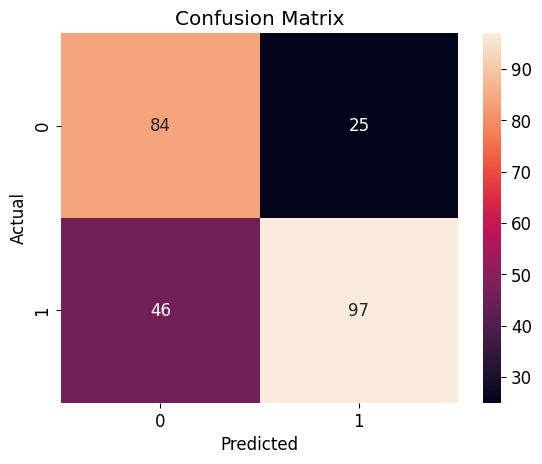

Classification Accuracy: 0.7182539682539683
Classification Error: 0.28174603174603174
False Positive Rate: 0.22935779816513763
Precision: 0.7950819672131147
AUC Score: 0.7244819400782704
Cross-validated AUC: 0.7811883847577594
First 10 predicted responses:
 [1. 0. 0. 0. 1. 0. 1. 1. 1. 0.]
First 10 predicted probabilities of class members:
 [[0.29868518 0.70131482]
 [0.53931164 0.46068836]
 [0.73918491 0.26081509]
 [0.83704246 0.16295754]
 [0.43260428 0.56739572]
 [0.59912121 0.40087879]
 [0.14834098 0.85165902]
 [0.09495687 0.90504313]
 [0.2691588  0.7308412 ]
 [0.69476881 0.30523119]]
First 10 predicted probabilities:
 [[0.70131482]
 [0.46068836]
 [0.26081509]
 [0.16295754]
 [0.56739572]
 [0.40087879]
 [0.85165902]
 [0.90504313]
 [0.7308412 ]
 [0.30523119]]


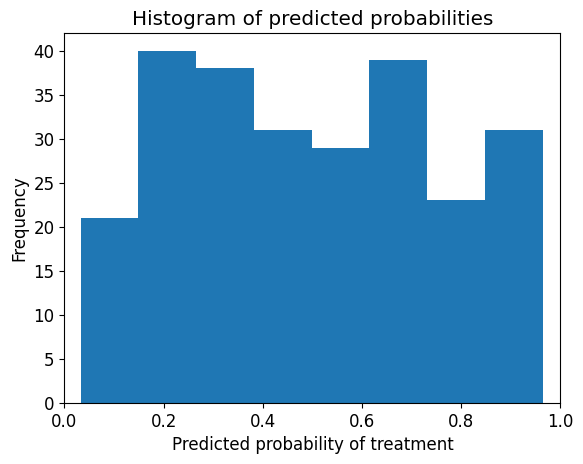

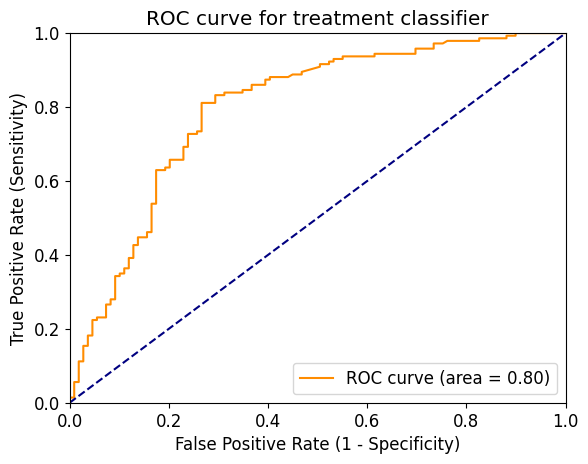

[[84 25]
 [46 97]]


In [475]:
def logisticRegression():
    # Train a logistic regression model on the training set
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    
    # Make class predictions for the testing set
    y_pred_class = logreg.predict(X_test)
    
    print('----------- Logistic Regression -------------')
    
    # Ensure evalClassModel() works correctly
    accuracy_score = evalClassModel(logreg, y_test, y_pred_class, plot=True)

    # Store accuracy score in dictionary
    methodDictionary['Log. Regres.'] = accuracy_score * 100

logisticRegression()

------------ KNeighborsClassifier ------------
578     0.0
102     0.0
52      0.0
64      0.0
1108    1.0
       ... 
158     1.0
565     1.0
406     1.0
245     1.0
859     1.0
Name: treatment, Length: 252, dtype: float64 [1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0.
 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1.
 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0.
 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0.
 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1.
 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1.]
Accuracy

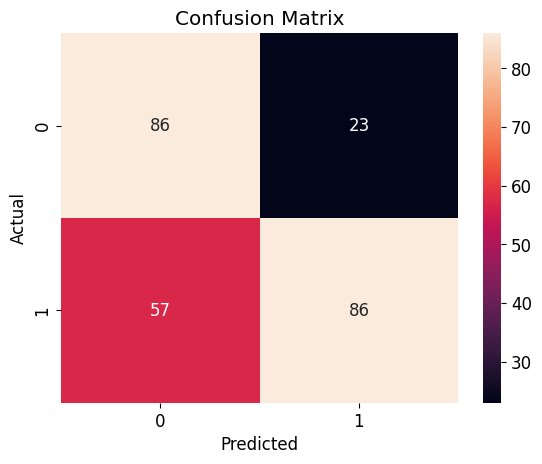

Classification Accuracy: 0.6825396825396826
Classification Error: 0.31746031746031744
False Positive Rate: 0.21100917431192662
Precision: 0.7889908256880734
AUC Score: 0.6951947135433373
Cross-validated AUC: 0.7498511579394297
First 10 predicted responses:
 [1. 0. 0. 0. 1. 0. 1. 1. 1. 0.]
First 10 predicted probabilities of class members:
 [[0.2962963  0.7037037 ]
 [0.7037037  0.2962963 ]
 [0.59259259 0.40740741]
 [0.81481481 0.18518519]
 [0.40740741 0.59259259]
 [0.66666667 0.33333333]
 [0.48148148 0.51851852]
 [0.18518519 0.81481481]
 [0.22222222 0.77777778]
 [0.59259259 0.40740741]]
First 10 predicted probabilities:
 [[0.7037037 ]
 [0.2962963 ]
 [0.40740741]
 [0.18518519]
 [0.59259259]
 [0.33333333]
 [0.51851852]
 [0.81481481]
 [0.77777778]
 [0.40740741]]


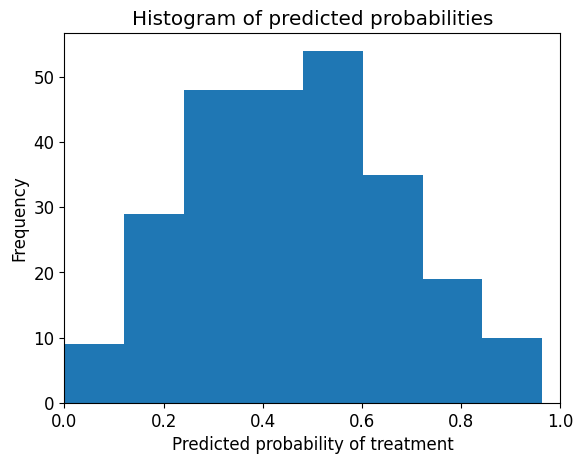

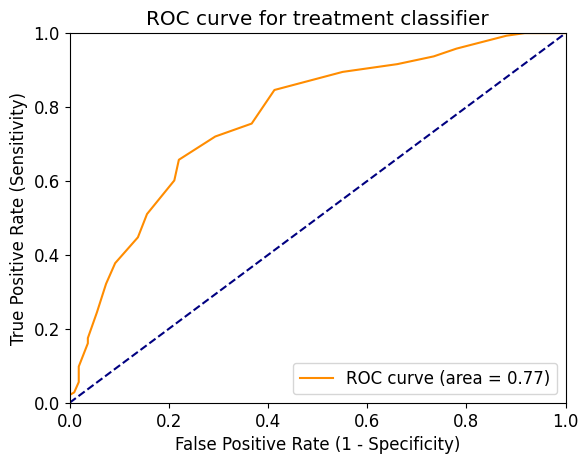

[[86 23]
 [57 86]]


In [476]:
def Knn():
    # Calculating the best parameters
    knn = KNeighborsClassifier(n_neighbors=5)
    
    #tuningCV(knn)
    #tuningGridSerach(knn)
    #tuningMultParam(knn)
    
    # define the parameter values that should be searched
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']
    
    
    # train a KNeighborsClassifier model on the training set
    knn = KNeighborsClassifier(n_neighbors=27, weights='uniform')
    knn.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = knn.predict(X_test)
    
    print('------------ KNeighborsClassifier ------------')
    
    accuracy_score = evalClassModel(knn, y_test, y_pred_class, True)

    #Data for final graph
    methodDictionary['KNN'] = accuracy_score * 100
Knn()

-------------- Bagging -------------
578     0.0
102     0.0
52      0.0
64      0.0
1108    1.0
       ... 
158     1.0
565     1.0
406     1.0
245     1.0
859     1.0
Name: treatment, Length: 252, dtype: float64 [1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1.
 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1.
 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1.]
Accuracy: 0.654761

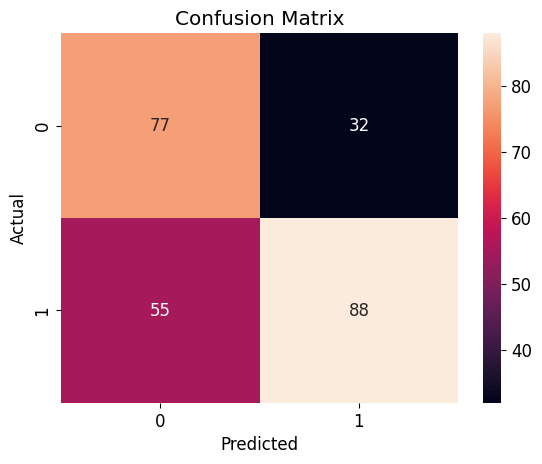

Classification Accuracy: 0.6547619047619048
Classification Error: 0.34523809523809523
False Positive Rate: 0.29357798165137616
Precision: 0.7333333333333333
AUC Score: 0.6609033168666196
Cross-validated AUC: 0.6953269504078021
First 10 predicted responses:
 [1. 1. 0. 0. 1. 1. 1. 1. 1. 0.]
First 10 predicted probabilities of class members:
 [[0.4        0.6       ]
 [0.         1.        ]
 [0.52166667 0.47833333]
 [1.         0.        ]
 [0.         1.        ]
 [0.4        0.6       ]
 [0.1        0.9       ]
 [0.1        0.9       ]
 [0.1        0.9       ]
 [0.74492063 0.25507937]]
First 10 predicted probabilities:
 [[0.6       ]
 [1.        ]
 [0.47833333]
 [0.        ]
 [1.        ]
 [0.6       ]
 [0.9       ]
 [0.9       ]
 [0.9       ]
 [0.25507937]]


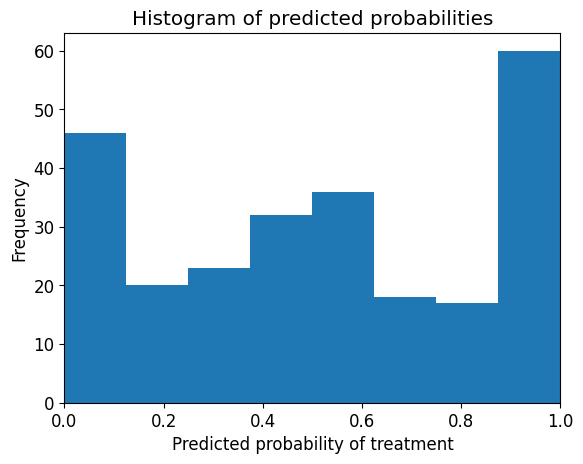

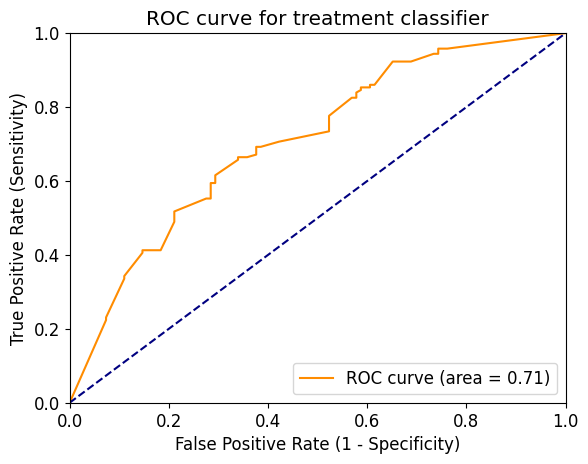

[[77 32]
 [55 88]]


In [477]:
def bagging():
    # Building and fitting 
    bag = BaggingClassifier(DecisionTreeClassifier(), max_samples=1.0, max_features=1.0, bootstrap_features=False)
    bag.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = bag.predict(X_test)
    
    print('-------------- Bagging -------------')
    
    accuracy_score = evalClassModel(bag, y_test, y_pred_class, True)

    #Data for final graph
    methodDictionary['Bagging'] = accuracy_score * 100
bagging()

c:\Users\Suel.Abbasi\Desktop\DSA\projects\end to end ml project\mental health prediction\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


-------------- Boosting -----------------
578     0.0
102     0.0
52      0.0
64      0.0
1108    1.0
       ... 
158     1.0
565     1.0
406     1.0
245     1.0
859     1.0
Name: treatment, Length: 252, dtype: float64 [1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0.
 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0.
 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1.
 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
Accuracy: 0.7

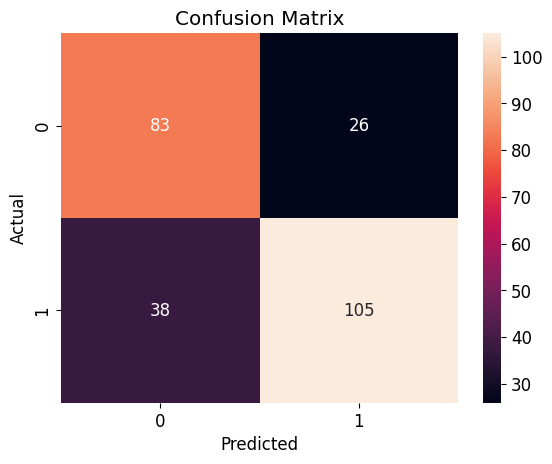

Classification Accuracy: 0.746031746031746
Classification Error: 0.25396825396825395
False Positive Rate: 0.23853211009174313
Precision: 0.8015267175572519
AUC Score: 0.7478668120869956


c:\Users\Suel.Abbasi\Desktop\DSA\projects\end to end ml project\mental health prediction\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\Suel.Abbasi\Desktop\DSA\projects\end to end ml project\mental health prediction\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\Suel.Abbasi\Desktop\DSA\projects\end to end ml project\mental health prediction\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\Suel.Abbasi\Desktop\DSA\projects\end to end ml project\mental health prediction\venv\lib\site-packages\sklearn\ensemble\_weight_bo

Cross-validated AUC: 0.7795968186856771
First 10 predicted responses:
 [1. 1. 0. 0. 1. 0. 1. 1. 1. 0.]
First 10 predicted probabilities of class members:
 [[0.47952842 0.52047158]
 [0.48372729 0.51627271]
 [0.55882481 0.44117519]
 [0.58379062 0.41620938]
 [0.4973197  0.5026803 ]
 [0.53867872 0.46132128]
 [0.39150368 0.60849632]
 [0.37670276 0.62329724]
 [0.46218028 0.53781972]
 [0.55882481 0.44117519]]
First 10 predicted probabilities:
 [[0.52047158]
 [0.51627271]
 [0.44117519]
 [0.41620938]
 [0.5026803 ]
 [0.46132128]
 [0.60849632]
 [0.62329724]
 [0.53781972]
 [0.44117519]]


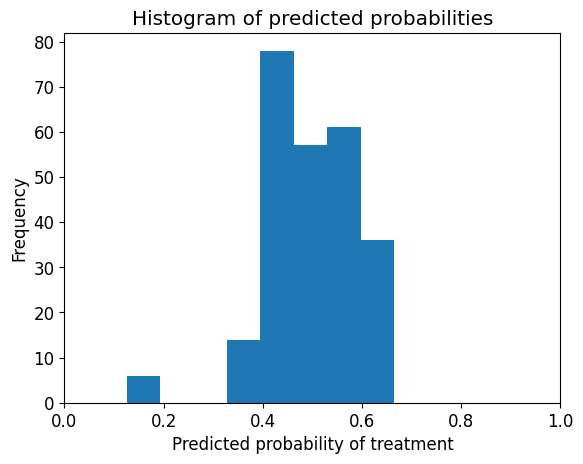

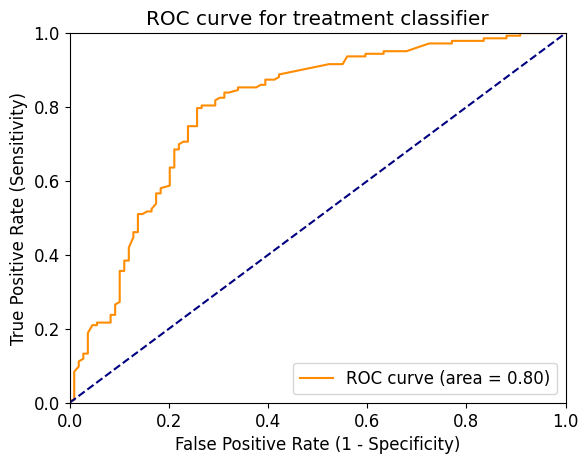

[[ 83  26]
 [ 38 105]]


In [478]:
def boosting():
    # Building and fitting the model
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)
    
    # Use `estimator` instead of `base_estimator` and explicitly set algorithm="SAMME"
    boost = AdaBoostClassifier(estimator=clf, n_estimators=500, algorithm="SAMME")
    
    boost.fit(X_train, y_train)
    
    # Make class predictions for the testing set
    y_pred_class = boost.predict(X_test)
    
    print('-------------- Boosting -----------------')
    
    # Evaluate the model
    accuracy_score = evalClassModel(boost, y_test, y_pred_class, plot=True)

    # Data for final graph
    methodDictionary['Boosting'] = accuracy_score * 100

boosting()

c:\Users\Suel.Abbasi\Desktop\DSA\projects\end to end ml project\mental health prediction\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


-------------- Boosting -----------------
578     0.0
102     0.0
52      0.0
64      0.0
1108    1.0
       ... 
158     1.0
565     1.0
406     1.0
245     1.0
859     1.0
Name: treatment, Length: 252, dtype: float64 [1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0.
 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0.
 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1.
 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
Accuracy: 0.7

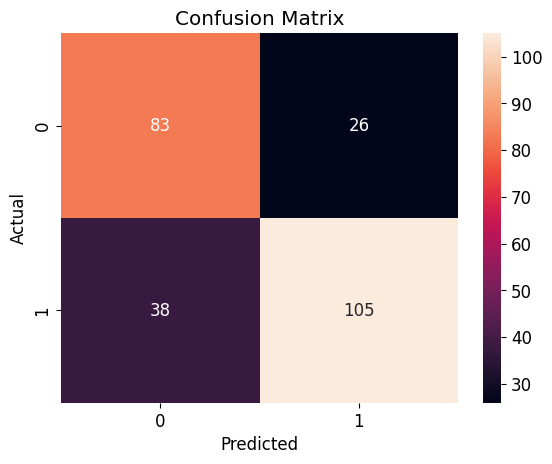

Classification Accuracy: 0.746031746031746
Classification Error: 0.25396825396825395
False Positive Rate: 0.23853211009174313
Precision: 0.8015267175572519
AUC Score: 0.7478668120869956


c:\Users\Suel.Abbasi\Desktop\DSA\projects\end to end ml project\mental health prediction\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\Suel.Abbasi\Desktop\DSA\projects\end to end ml project\mental health prediction\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\Suel.Abbasi\Desktop\DSA\projects\end to end ml project\mental health prediction\venv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\Users\Suel.Abbasi\Desktop\DSA\projects\end to end ml project\mental health prediction\venv\lib\site-packages\sklearn\ensemble\_weight_bo

Cross-validated AUC: 0.7795968186856771
First 10 predicted responses:
 [1. 1. 0. 0. 1. 0. 1. 1. 1. 0.]
First 10 predicted probabilities of class members:
 [[0.47952842 0.52047158]
 [0.48372729 0.51627271]
 [0.55882481 0.44117519]
 [0.58379062 0.41620938]
 [0.4973197  0.5026803 ]
 [0.53867872 0.46132128]
 [0.39150368 0.60849632]
 [0.37670276 0.62329724]
 [0.46218028 0.53781972]
 [0.55882481 0.44117519]]
First 10 predicted probabilities:
 [[0.52047158]
 [0.51627271]
 [0.44117519]
 [0.41620938]
 [0.5026803 ]
 [0.46132128]
 [0.60849632]
 [0.62329724]
 [0.53781972]
 [0.44117519]]


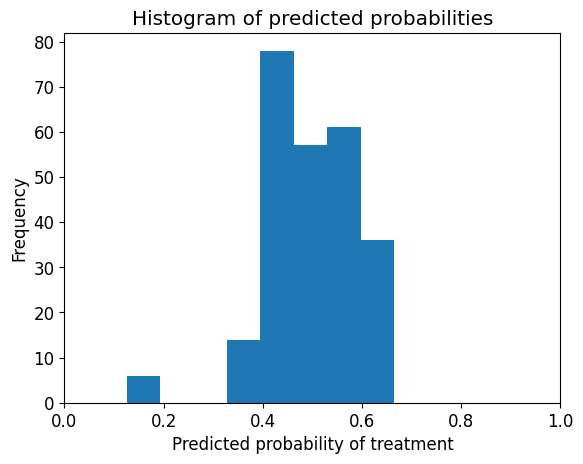

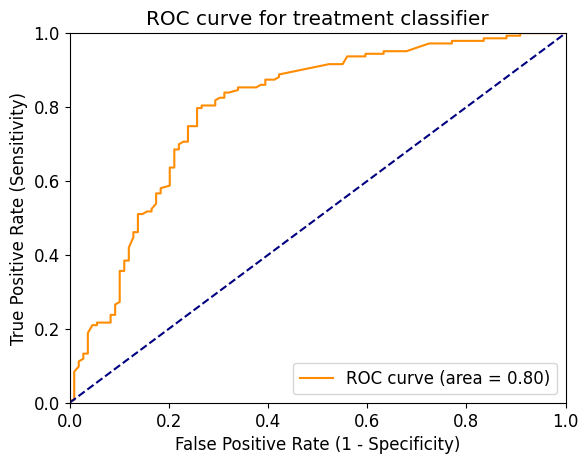

[[ 83  26]
 [ 38 105]]


In [479]:
def boosting():
    # Building and fitting the model
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)
    
    # Use `estimator` instead of `base_estimator` and explicitly set algorithm="SAMME"
    boost = AdaBoostClassifier(estimator=clf, n_estimators=500, algorithm="SAMME")
    
    boost.fit(X_train, y_train)
    
    # Make class predictions for the testing set
    y_pred_class = boost.predict(X_test)
    
    print('-------------- Boosting -----------------')
    
    # Evaluate the model
    accuracy_score = evalClassModel(boost, y_test, y_pred_class, plot=True)

    # Data for final graph
    methodDictionary['Boosting'] = accuracy_score * 100

boosting()

In [480]:
from tensorflow import keras
# Suppress TensorFlow logging
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # 0 = all messages are logged (default), 1 = INFO messages are not printed, 2 = INFO and WARNING messages are not printed, 3 = INFO, WARNING, and ERROR messages are not printed

def neural_network():
    nn_model = keras.Sequential([
        keras.layers.Dense(64, activation='relu',input_shape=(X_train.shape[1],)),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    
    nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return nn_model


# Custom cross-validation loop
cv = StratifiedKFold(n_splits=5)
auc_scores = []
accuracy_scores = []

for train_idx, test_idx in cv.split(x_scaled_df, y):
    X_train, X_test = x_scaled_df.iloc[train_idx], x_scaled_df.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    model = neural_network()
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Data for final graph
methodDictionary['nn_model'] = np.mean(accuracy_scores)  * 100

c:\Users\Suel.Abbasi\Desktop\DSA\projects\end to end ml project\mental health prediction\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


c:\Users\Suel.Abbasi\Desktop\DSA\projects\end to end ml project\mental health prediction\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


c:\Users\Suel.Abbasi\Desktop\DSA\projects\end to end ml project\mental health prediction\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


c:\Users\Suel.Abbasi\Desktop\DSA\projects\end to end ml project\mental health prediction\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


c:\Users\Suel.Abbasi\Desktop\DSA\projects\end to end ml project\mental health prediction\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


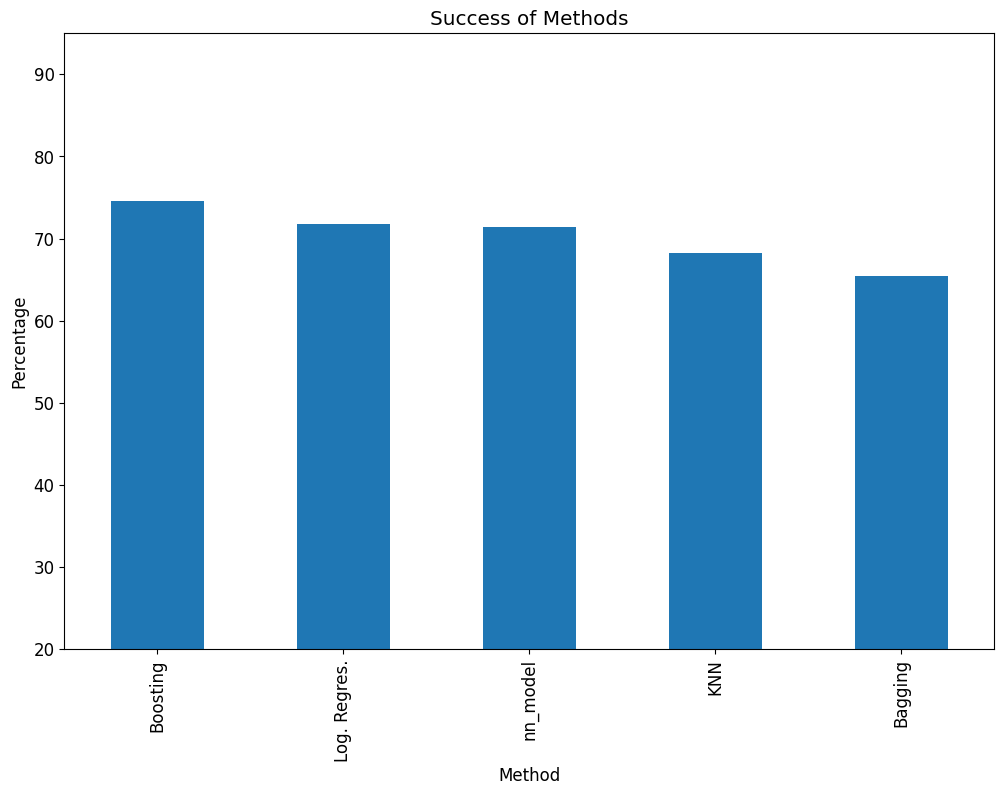

In [481]:
def plotSuccess():
    success = pd.Series(methodDictionary)
    success = success.sort_values(ascending=False)
    
    plt.figure(figsize=(12, 8)) 
    
    # Create bar plot
    ax = success.plot(kind='bar') 
    plt.ylim([20.0, 95.0])  # Set y-axis limits
    plt.xlabel('Method')
    plt.ylabel('Percentage')
    plt.title('Success of Methods')
    
    plt.show()
    
plotSuccess()